In [ ]:
#pip uninstall pandas_profiling

In [ ]:
#pip install pandas-profiling[notebook,yhtml]

In [ ]:
#pip install markupsafe==2.0.1

In [ ]:
''' import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file '''


' import pandas_profiling\nfrom pandas_profiling import ProfileReport\nfrom pandas_profiling.utils.cache import cache_file '

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/LabTIC/


/content/gdrive/MyDrive/LabTIC


In [ ]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

# Ford car price prediction. 
### A continuación, se presenta el dataset de Ford car price prediction (disponible en https://www.kaggle.com/code/abdelrahmankhalil/ford-car-price-prediction/log), donde el principal proposito es proporcionar datos para generar una prediccion de el precio de venta de un auto segun sus atributos (con 17.966 observaciones por cada uno), para lo que se presentan 9 variables las cuales son:
1 - Model, Variable culitativa que no prioriza alguna categoría sobre otra. Esta variable describe el modelo específico del cada automóvil.

2 - Year, Variable cuantitativa discreta que indica el año de lanzamiento del vehículo.

3 - Price, variable cuantitativa continua que hace referencia al precio del automóvil.

4 - Transmision, variable caulitativa sin priorizar el tipo de transmisión del automóvil ya sea manual, automática o semi.

5 - Mileage, variable cuantitativa continua que hace referencia al uso o kilometraje del vehículo.

6 - FulType, variable cuaitativa categorica que prioriza la categoria petroleo sobre las demas.

7 - Tax, variable cuantitativa discreta que nos indica cuanto es lo que se paga por impuestos al vehículo anualmente (por medioambiente).

8 - mpg, variable cuantitativa continua, dando informacion sobre cuantas millas rinde en promedio por galón de combustible cada modelo de vehículo.

9 - EngineSize, variable cuantitativa continua que hace referencia a cuanto gasta o consume el motor del automóvil.



In [ ]:
data_cars = pd.read_csv('ford.csv')
data_cars.columns= ['modelo','year','precio','transmision','millas_rec','combustible','impuestos', 'mpg', 'tmn_motor']

#data_cars.head()
data_cars.describe()
#data_cars.info()

,year,precio,millas_rec,impuestos,mpg,tmn_motor
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
# Se eliminan casillas vacías y un auto q sale del 2060

data_cars.dropna()
filter = data_cars["year"] < 2030 
data_cars.where(filter, inplace = True)

In [ ]:
# Se realiza un reporte general 

''' profile = ProfileReport(data_cars, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()
 '''
# Con esto se puede hacer un análisis general de cada una de las variables 
# como por ejemplo de sus medidas de tendencia central, de dispersión
# también sus interacciones, la cantidad de celdas vacías, duplicadas, etc


' profile = ProfileReport(data_cars, title="Pandas Profiling Report", explorative=True)\nprofile.to_notebook_iframe()\n '

## Extracción de Outliers

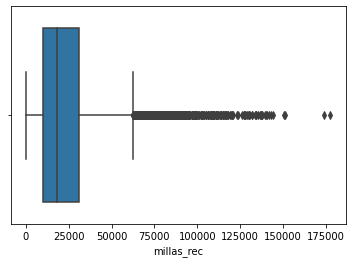

In [ ]:
# La desviación estandar es muy alta en las millas recorridas, por lo que se analiza el boxplot

ax = sns.boxplot(x=data_cars["millas_rec"])

In [ ]:
# Se eliminan los outliers 

''' low, high = data_cars["millas_rec"].quantile([0.05,0.90])
mask_ma = data_cars["millas_rec"].between(low,high)
data_cars = data_cars[mask_ma]

ax = sns.boxplot(x=data_cars["millas_rec"]) '''

# En general existen outliers en otras variables pero en las millas fue en la variable que más destaca

' low, high = data_cars["millas_rec"].quantile([0.05,0.90])\nmask_ma = data_cars["millas_rec"].between(low,high)\ndata_cars = data_cars[mask_ma]\n\nax = sns.boxplot(x=data_cars["millas_rec"]) '

## Boxplot ##



In [ ]:
# Funcion generadora de boxplot (string,string,data_frame), 
# salida ---> boxplot

def boxplot(variable_x,variable_y,data):

  sns.set_theme(style="whitegrid")
  
  
  sns.set(color_codes = True)
  fig = plt.figure(figsize = (10,5))
  ax = fig.add_axes([0,0,1,1])
  ax = sns.boxplot(x= variable_x, y=variable_y, data=data_cars)
  plt.xticks(rotation='vertical')
  plt.title(variable_x.upper()+" v/s "+ variable_y.upper())


  

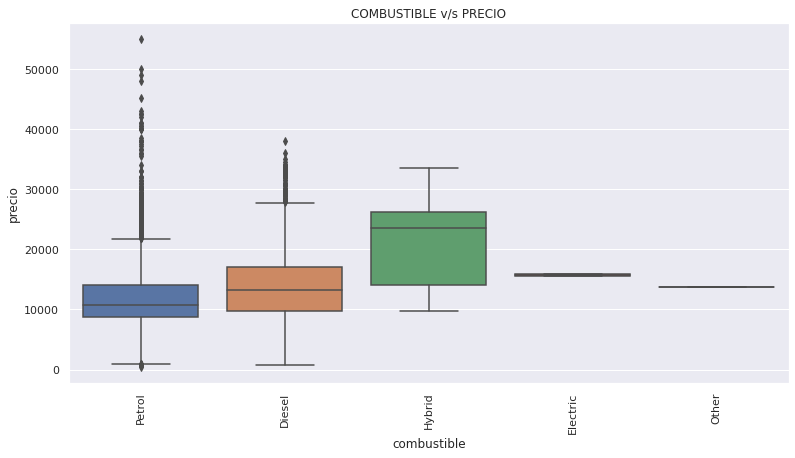

In [ ]:
# Se aplica función boxplot

boxplot("combustible","precio",data_cars)

# boxplot("transmision", "precio", data_cars)
# boxplot("modelo", "precio", data_cars)

# Existen varios outliers, en su mayoría en tipo de combustible petroleo
# Hibridos tienen un promedio mayor de precio

#kurtosis y Skewness

In [ ]:
# Funcion para calcular Skewness y Kurtosis
def kt(data):
  return st.kurtosis(data, axis=0,bias=True)

def skew(data):
  return st.skew(data, axis = 0, bias = True)

In [ ]:
variable = data_cars["millas_rec"]
print ("kurtosis: " + str(round(kt(variable),2)) )
print ("Skewness: "+ str(round(skew(variable),2)) )

# vemos distribucion leptokurtic ya que es < 3
# con Skewness confirmamos que la var no tiene valores atípicos

# Esto es porque se eliminaron anteriormente 
# ya que antes de ello el valor de skn era 13

kurtosis: nan
Skewness: nan


## Tabla de Frecuencia 


In [ ]:
# Definición de funciones para crear la tabla

# generamos tabla de frecuencia (data_frame,"nombre variable"), 
# salida ---> tabla de frecuencia
def tbl_frec(data_cars,x):
  return (data_cars 
           .groupby(x)
           .agg(frequency=(x, "count")))
  
# especificamos el numero de intervalos (data_frame,"nombre variable"),
# salida ---> tabla intervalos
def intervalos(data_cars,x):
  data_cars[x+"_group"] = pd.cut(data_cars[x], bins=5)
  return (data_cars
           .groupby(x+"_group")
           .agg(frequency=(x, "count")))
  
# generamos intervalos especificos dado la tabla anterior si es que se desea (entero,entero,dataframe,"variable")
def int_esp(min,max,sep,data_cars,a):
  bins = list(range(min, max+1, sep))

  data_cars[a+"_group"] = pd.cut(data_cars[a], bins=bins)
  return (data_cars
           .groupby(a+"_group")
           .agg(frequency=(a, "count")))
  


In [ ]:
# int_esp(440,54995,1000,data_cars,"precio")
#int_esp(20,89,10,data_cars,"mpg")

# Esto también cambió con el retiro de los outliers

,frequency
mpg_group,
"(20, 30]",75
"(30, 40]",776
"(40, 50]",2812
"(50, 60]",6094
"(60, 70]",6744
"(70, 80]",1268


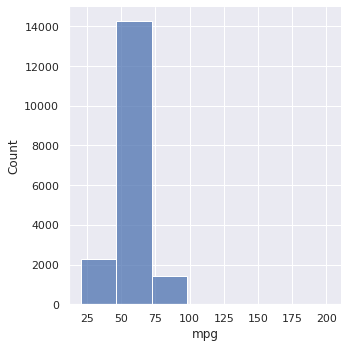

In [ ]:
sns.displot(data_cars, x="mpg",bins=7)
plt.show()

## Analisis de Correlación

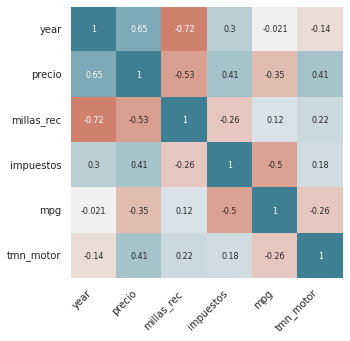

In [ ]:
# Antes de realizar análisis de variables en conjunto se observa la correlación de las variables para hacerse una idea 
# En este caso se usa el método de pearson que analiza variables CUANTITATIVAS

# Se queda fuera TRANSMISION, MODELO Y COMBUSTIBLE
crr_mtrx = data_cars.corr(method='pearson')
crr_mtrx

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    crr_mtrx,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


Matriz de Correlaciones

En un principio, como se dará especial énfasis en el precio se destaca la correlación de esta variable con el resto.

Solamente con variables cuantitativas 6/9
Falta cualitativas -> Transmision, Tipo Combustible, Modelo

- Precio v Año -> Correlación positiva (0.53) 
- Precio v Impuestos -> Correlación Positiva (0.41) 
- Precio v Tmñ Motor -> Correlación Positiva (0.56) 
- Precio v Millas_Rec -> Correlación negativa (-0.34) 
- Precio v MpG -> Correlación negativa (-0.41) 
(Autos chicos pq son de motores pequeños)

Otras relaciones

- Year v millas_rec -> correlacion negartiva (-0,52) (a menor cantidad de años tiende a tener menos kiometraje) 



## Gráficos 

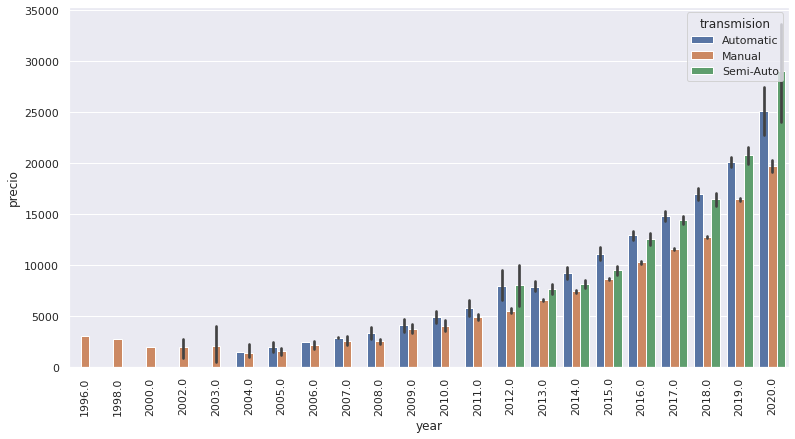

In [ ]:
# Ahora se procede a realizar un análisis de variables combinadas 
# Grafico que muestra el precio basado en los años y segmentado por el tipo de transmisión (MANUAL, AUTO, SEMI)

sns.set(color_codes = True)
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')

ax = sns.barplot(x="year", y="precio", hue="transmision", data= data_cars)

# Se puede ver q desde 2011 empiezan a existir los autos semi automaticos 
# También se aprecia una tendencia lineal positiva con el pasar de los años 

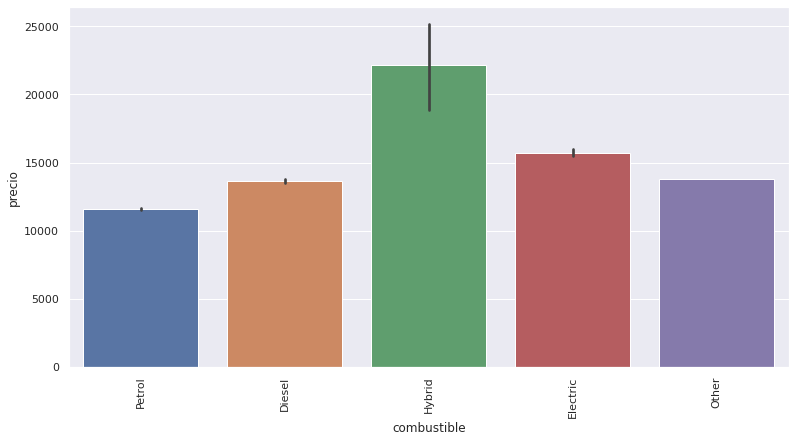

In [ ]:
# Se realiza gráfico de precio vs combustible 
sns.set(color_codes = True)
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')

ax = sns.barplot(x="combustible", y="precio", data= data_cars)

# Se observa que los autos de tipo de combustible hibrido tienen 
# un promedio mayor de precios en relación a los otros

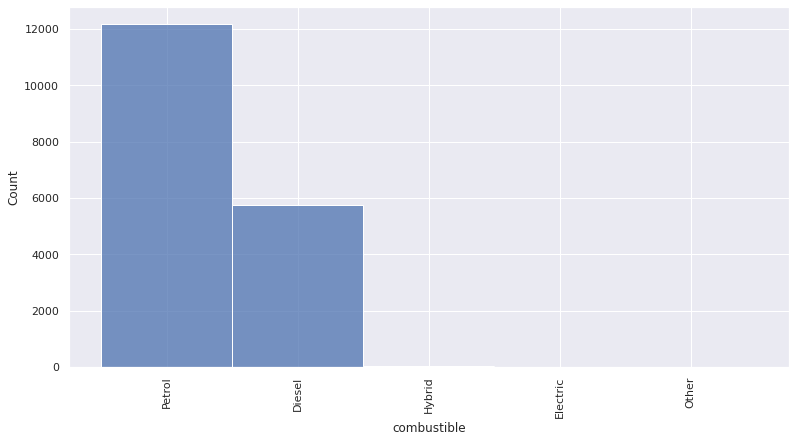

In [ ]:
# Pese a que el promedio de los autos hibridos es mayor 
# El tipo de combustible más repetido en la base de datos es de tipo Petrolero

sns.set(color_codes = True)
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')

sns.histplot(data=data_cars, x="combustible")


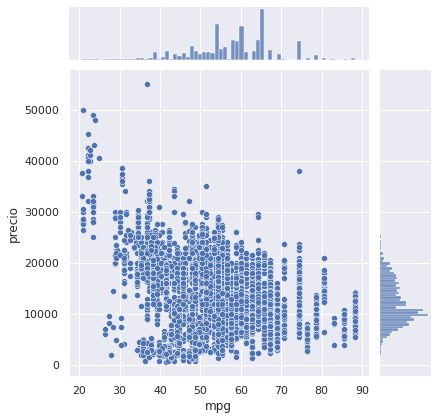

In [ ]:
# Se realizan gráficos de dispersión entre el precio y otras variables 

filter = data_cars["mpg"] < 150 
data_cars.where(filter, inplace = True)

# Se puede cambiar variable 
# Opciones: year, millas_rec, impuestos, mpg, tmn_motor

sns.jointplot(x = "mpg" , y = "precio", data = data_cars);

# Se aprecia que existe una tendencia negativa entre precio y millas por galon 
# lo cual se condice con la correlación negatvia antes mencionada
# Aparte se muestran histogramas de cada variable

# Horizotal: mpg, max  ~ 65,55
# Vertical: precio, max ~ 100k





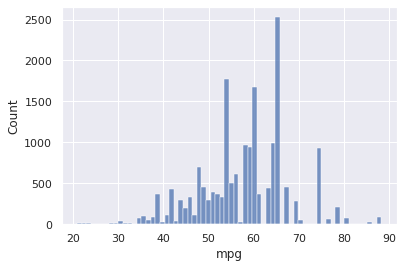

In [ ]:
# Se aprecia de mejor forma los histogramas que se muestran arriba 

sns.histplot(data=data_cars, x="mpg")

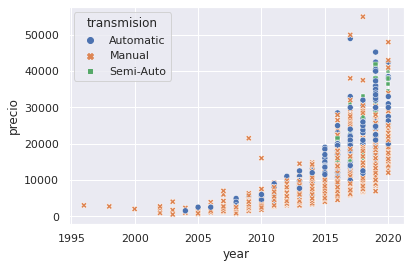

In [ ]:
# Grafico de dispersion segmentado por la transmisión

sns.scatterplot(data=data_cars, x="year", y="precio", hue="transmision", style="transmision")
plt.show()
# Se ve que el tipo de transmision automatico tiene una tendencia mucho mas marcada 
# que los otros, pese a que todas son positivas

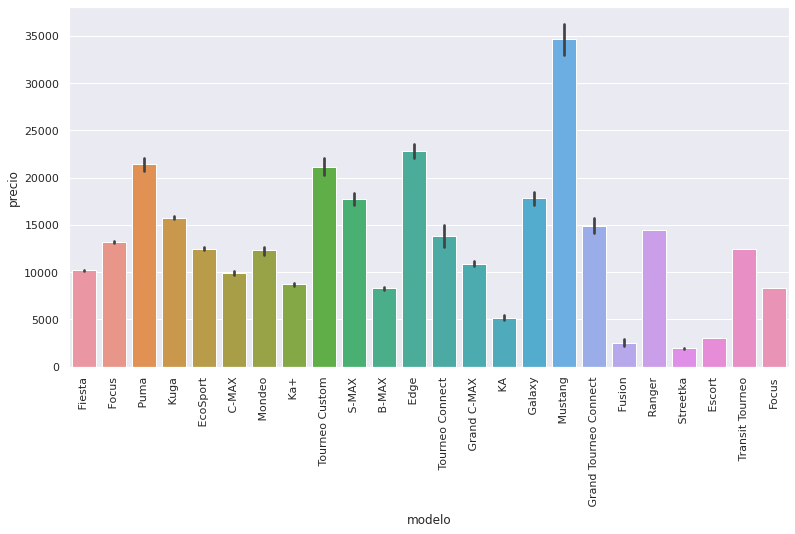

In [ ]:
# Tipos de modelos con mayor promedio de precios

sns.set(color_codes = True)
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')

ax = sns.barplot(x="modelo", y="precio", data= data_cars)

# Los modelos que máa precio tienen en promedio son mustang, edge y puma

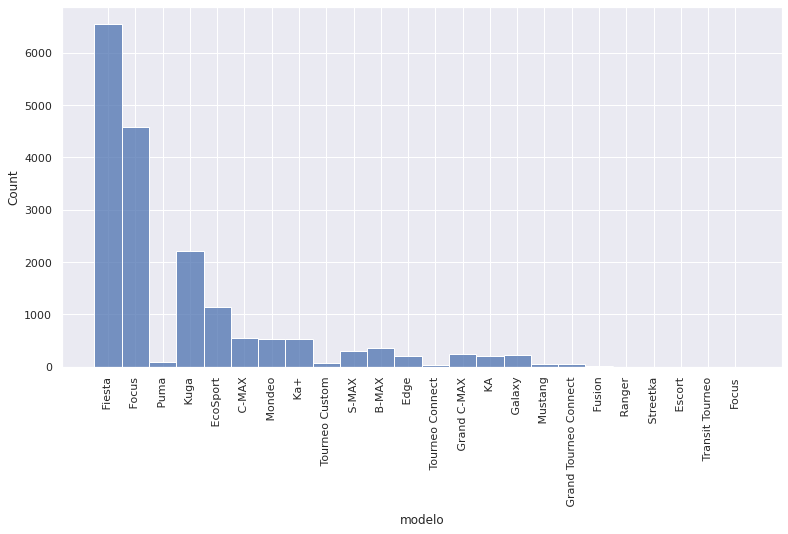

In [ ]:
sns.set(color_codes = True)
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')

ax = sns.histplot(data=data_cars, x="modelo")

# Pero, el modelo más repetido es el ford fiesta seguido por focus


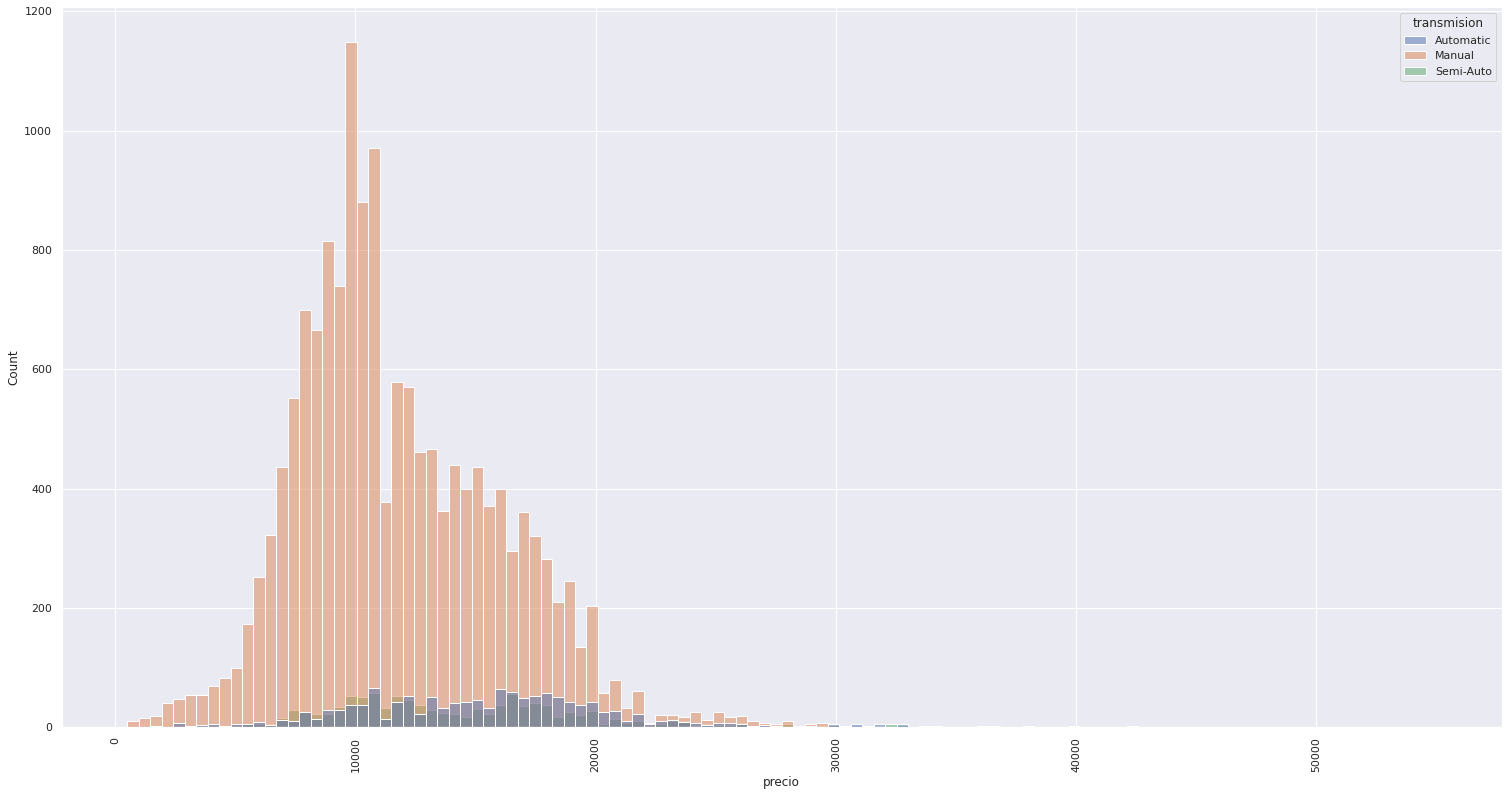

In [ ]:
# Histogramas del tipo de transmision
sns.set(color_codes = True)
fig = plt.figure(figsize = (20 ,10))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
sns.histplot(data=data_cars, x="precio",hue="transmision")

# Se aprecia que la cantidad de autos manuales es muy superior a los otros tipos


#**Regresión Lineal Multivariable**#

In [ ]:
# Se separan atributos más importantes y se normalizan los datos

car_num = data_cars.drop(['modelo','combustible','transmision','mpg_group'], axis=1)

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

car_num_norm = mean_norm(car_num)



In [ ]:
# Se separa en data de entrenamiento y test 

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sfm 
import statsmodels.api as sm

training_data, testing_data = train_test_split(car_num_norm, test_size=0.2, random_state=25)

x_train = training_data[['year','millas_rec','impuestos','mpg' ,'tmn_motor']]
y_train = training_data['precio']

x_test = testing_data[['year','millas_rec','impuestos','mpg' ,'tmn_motor']]
y_test = testing_data['precio']


lm = sfm.ols(formula="precio~year+millas_rec+impuestos+mpg +tmn_motor",data=training_data).fit() 
lm.params
lm.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        06:35:15   Log-Likelihood:                -10714.
No. Observations:               14367   AIC:                         2.144e+04
Df Residuals:                   14361   BIC:                         2.149e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.004      0.468      0.640      -0.006       0.010
year           0.5627      0.006     88.480      0.000       0.550       0.575
millas_rec    -0.2083      0.006    -32.641      0.000      -0.221      -0.196
impuestos     -0.0126      0.005     -2.383      0.017      -0.023      -0.002
mpg           -0.2023      0.005    -38.783      0.000      -0.213      -0.192
tmn_motor      0.4791      0.005    103.704      0.000       0.470       0.488
==============================================================================
Omnibus:                     2733.930   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23130.273
Skew:                           0.676   Prob(JB):                         0.00
Kurtosis:                       9.067   Cond. No.                         2.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        06:35:15   Log-Likelihood:                -10714.
No. Observations:               14367   AIC:                         2.144e+04
Df Residuals:                   14361   BIC:                         2.149e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.004      0.468      0.640      -0.006       0.010
year           0.5627      0.006     88.480      0.000       0.550       0.575
millas_rec    -0.2083      0.006    -32.641      0.000      -0.221      -0.196
impuestos     -0.0126      0.005     -2.383      0.017      -0.023      -0.002
mpg           -0.2023      0.005    -38.783      0.000      -0.213      -0.192
tmn_motor      0.4791      0.005    103.704      0.000       0.470       0.488
==============================================================================
Omnibus:                     2733.930   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23130.273
Skew:                           0.676   Prob(JB):                         0.00
Kurtosis:                       9.067   Cond. No.                         2.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predicts = pd.DataFrame()

predicts['y_test_real'] = y_test
predicts['y_predict'] = lm.predict(x_test)


print(predicts)

       y_test_real  y_predict
4538     -0.552687  -0.487518
15380    -0.863672  -0.328678
13072     0.999066   0.570144
11368     0.026366   0.508298
4105      0.785541   0.731235
...            ...        ...
3818      1.104137   0.305024
4868      0.047719   0.047867
9618     -0.100269  -0.198994
10650    -0.376159  -0.105610
16024    -1.042736  -1.001772

[3594 rows x 2 columns]


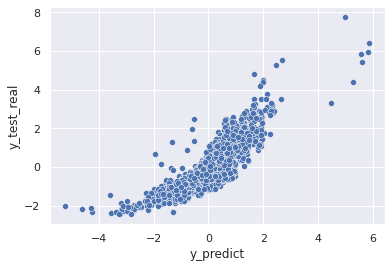

In [ ]:
ax= sns.scatterplot(data=predicts, x="y_predict", y="y_test_real")


In [ ]:
import math
 
MSE = np.square(np.subtract(y_test,lm.predict(x_test))).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

def mape ( actual , pred ):
    actual, pred = np.array (actual), np.array (pred)
    return np.mean (np.abs ((actual - pred) / actual)) * 100

print(mape(y_test,lm.predict(x_test)))





Root Mean Square Error:

0.5083332563699307
nan


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = car_num_norm[['year','millas_rec','impuestos','mpg' ,'tmn_motor','precio']].dropna().values
x = StandardScaler().fit_transform(x)
y = data_cars['modelo']



pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])

finalDf = pd.concat([principalDf, y], axis = 1)

finalDf

,pca1,pca2,modelo
0,0.310833,-0.519647,Fiesta
1,0.931886,-0.830209,Focus
2,0.505265,-0.576714,Focus
3,2.211381,0.565998,Fiesta
4,1.883098,-0.744746,Fiesta
...,...,...,...
17961,NaN,NaN,B-MAX
17962,NaN,NaN,B-MAX
17963,NaN,NaN,Focus
17964,NaN,NaN,KA


In [ ]:
pd.DataFrame(
    data    = pca.components_,
    columns = car_num_norm[['year','millas_rec','impuestos','mpg' ,'tmn_motor','precio']].columns,
    index   = ['PC1', 'PC2'])

# Aqui se ve cuanto representa cada variable en las pca para asi saber q significan los cluster

## pc1 autos caros  mas impuestosnuevso menos millas rec 

,year,millas_rec,impuestos,mpg,tmn_motor,precio
PC1,0.475473,-0.451692,0.405366,-0.315809,0.132537,0.536914
PC2,-0.402670,0.417880,0.266096,-0.463969,0.608337,0.084172


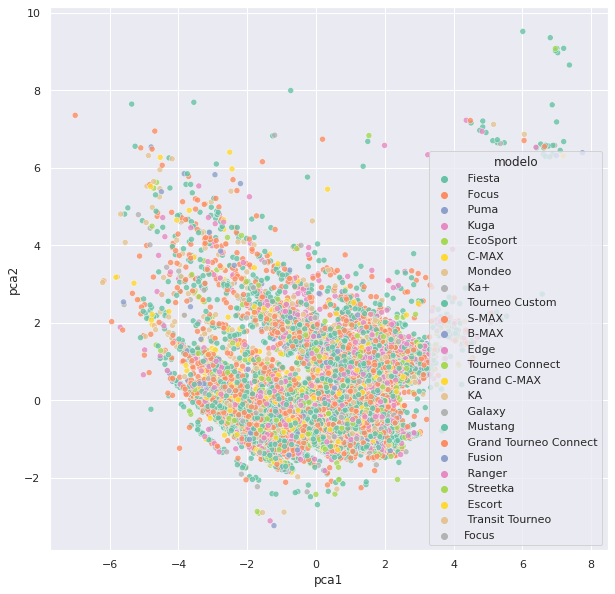

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=finalDf, x='pca1', y='pca2', hue='modelo', palette='Set2', alpha=0.8)

# Por ejemplo, con los modelos se podrían hacer distintos cluster 

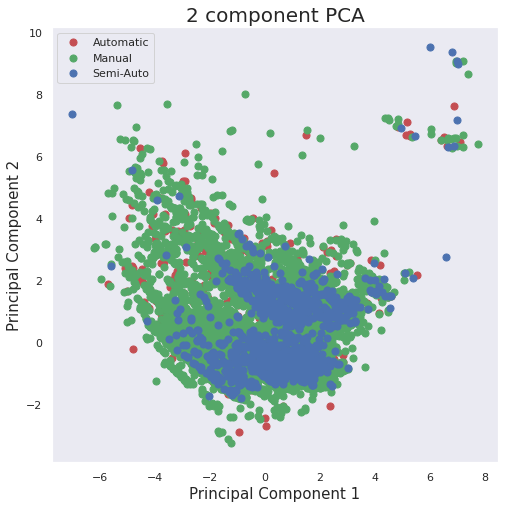

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Automatic','Manual','Semi-Auto']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['transmision'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Aqui se ve q no hay grupos marcados entre tipos de transmision

##Clustering##

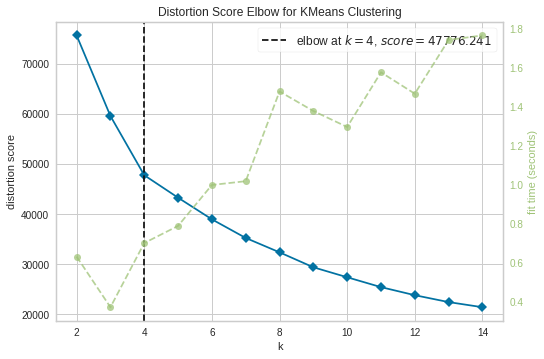

In [ ]:
# Esto se realiza con la data ya normalizada 
# Buscar links de donde saque esto para adeuarlo al modelo de autos 

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

''' se usa el x creado para pca '''

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(x)
visualizer.poof() 

In [ ]:
from sklearn.cluster import KMeans

df_cluster = data_cars.drop(['modelo','combustible','transmision','mpg_group'], axis=1).dropna()

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df_cluster)

In [ ]:
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_cluster['Clusters'] = predictions
df_cluster.head()

,year,precio,millas_rec,impuestos,mpg,tmn_motor,Clusters
0,2017.0,12000.0,15944.0,150.0,57.7,1.0,0
1,2018.0,14000.0,9083.0,150.0,57.7,1.0,0
2,2017.0,13000.0,12456.0,150.0,57.7,1.0,0
3,2019.0,17500.0,10460.0,145.0,40.3,1.5,0
4,2019.0,16500.0,1482.0,145.0,48.7,1.0,0


In [ ]:
df_cluster.Clusters.value_counts()

0    8732
2    6160
1    2411
3     657
Name: Clusters, dtype: int64

In [ ]:

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_cluster)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-7320.096976,-1261.417815,0
1,-14386.504257,-194.139507,0
2,-10910.287131,-735.445723,0
3,-13488.474415,3458.163408,0
4,-22252.968231,1269.980874,0


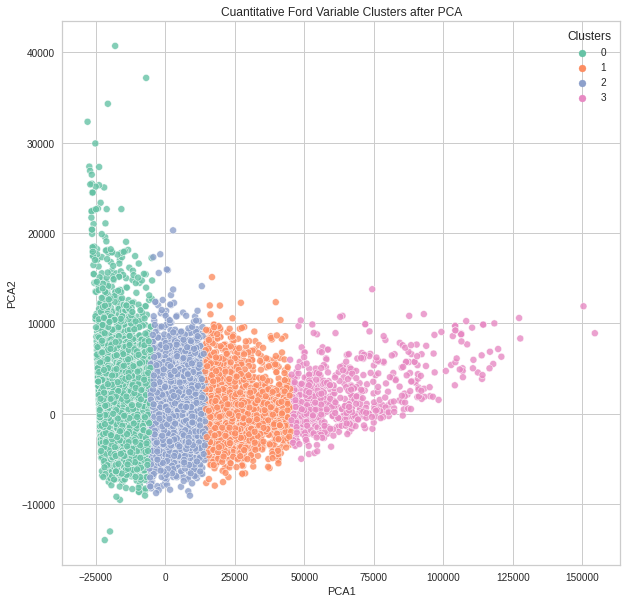

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Cuantitative Ford Variable Clusters after PCA');

# Este cambia mucho cuando no se limpian los outliers
# de hecho, cuando se quitan los outliers dan 5 grupos

# En general, se agrupan por el precio y por caracteristicas q hcaen q su precio sea mayor
# como por ej , menos millas, mayor impuesto, mas nuevos , etc.

# De hecho tambien se aprecia una tendencia descendente y esto se ve porque hay mas autos
# bartatos q caros 